In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

zip_file_path = '/content/drive/MyDrive/dataset/data.zip'
extracted_folder_path = '/content/'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print("Zip file extracted to:", extracted_folder_path)

Zip file extracted to: /content/


In [4]:
!ls "/content/RiceLeafs/train"

BrownSpot  Healthy  Hispa  LeafBlast


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array , array_to_img
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten , Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

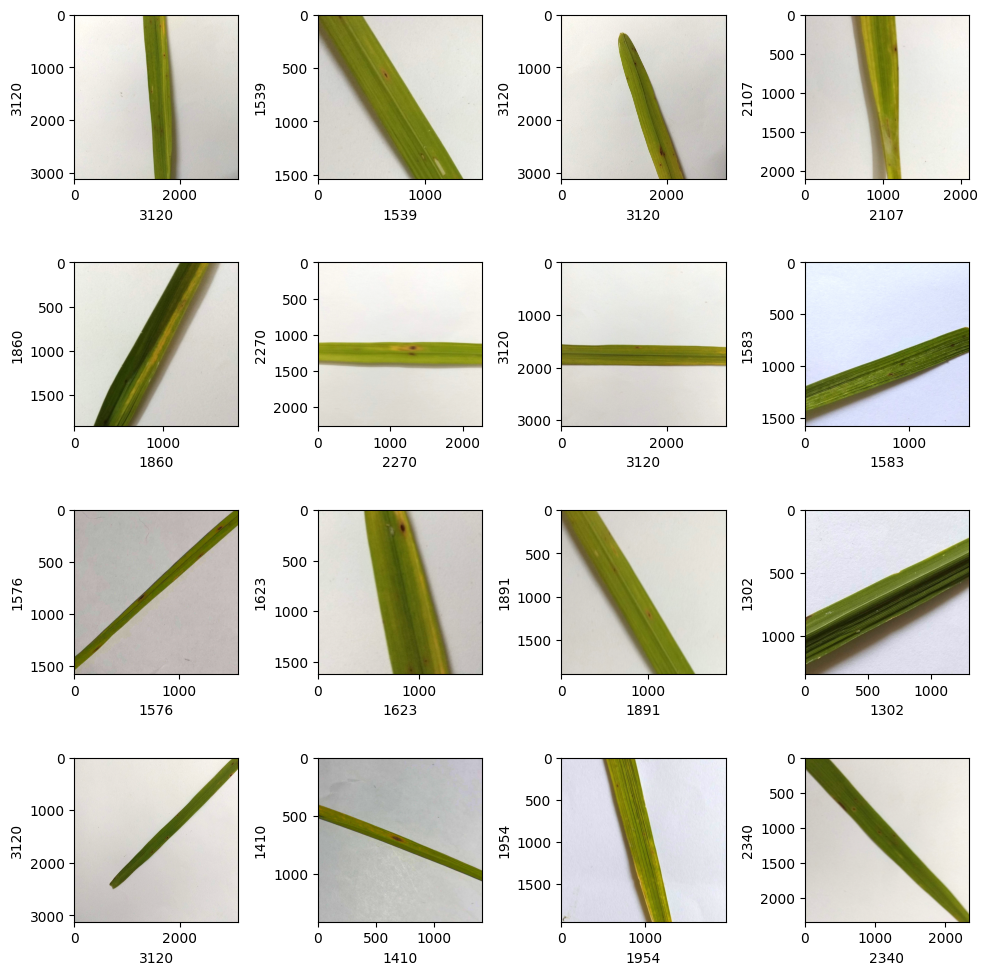

In [6]:
plt.figure(figsize=(10, 10))
path = "/content/RiceLeafs/train/BrownSpot"
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[1], fontsize = 10)


In [7]:
def convert_image_to_array(image_dir):
  try:
      image = cv2.imread(image_dir)
      if image is not None :
         image = cv2.resize(image, (224, 224))
         return img_to_array(image)
      else :
        return np.array([])
  except Exception as e:
        print(f"Error : {e}")
        return None


In [8]:
import os

dir = "/content/RiceLeafs/train"
image_list, label_list = [], []
all_labels = ['Healthy', 'Hispa', 'LeafBlast']
binary_labels = [0, 1, 2]
temp = -1

for directory in all_labels:
    plant_image_list = os.listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])


In [9]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    1191
2     623
1     452
dtype: int64

In [10]:
image_list[0].shape

(224, 224, 3)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)


In [12]:
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)



In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
model = Sequential()
model.add(Conv2D(30,(3,3), padding="same", input_shape=(224, 224, 3), activation="relu" ))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(40, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(60, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(20, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 40)        10840     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 40)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 60)        21660     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 60)       0

In [15]:

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])


In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

In [17]:
epochs=10
batch_size =32


In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

history = model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=( x_val, y_val) )



Epoch 1/10
46/46 [==============================] - 16s 78ms/step - loss: 1.0296 - accuracy: 0.5128 - val_loss: 1.0150 - val_accuracy: 0.5207
Epoch 2/10
46/46 [==============================] - 2s 50ms/step - loss: 1.0139 - accuracy: 0.5183 - val_loss: 1.0102 - val_accuracy: 0.5207
Epoch 3/10
46/46 [==============================] - 2s 51ms/step - loss: 1.0015 - accuracy: 0.5183 - val_loss: 0.9964 - val_accuracy: 0.5317
Epoch 4/10
46/46 [==============================] - 3s 59ms/step - loss: 0.9757 - accuracy: 0.5466 - val_loss: 0.9733 - val_accuracy: 0.5399
Epoch 5/10
46/46 [==============================] - 3s 55ms/step - loss: 0.9565 - accuracy: 0.5652 - val_loss: 0.9794 - val_accuracy: 0.5372
Epoch 6/10
46/46 [==============================] - 2s 50ms/step - loss: 0.9356 - accuracy: 0.5694 - val_loss: 0.9750 - val_accuracy: 0.5427
Epoch 7/10
46/46 [==============================] - 2s 50ms/step - loss: 0.9129 - accuracy: 0.5839 - val_loss: 0.9613 - val_accuracy: 0.5565
Epoch 8/10
4

In [19]:
model.save("/content/drive/MyDrive/rice_leaf_diseases/Model")

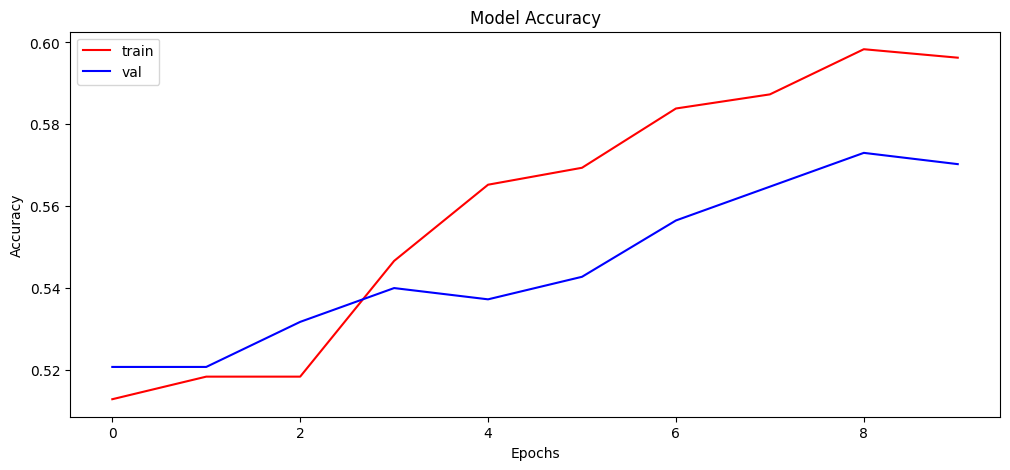

In [20]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [21]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test accuracy: {scores[1]*100}")

Calculating model accuracy
15/15 [==============================] - 0s 28ms/step - loss: 0.8821 - accuracy: 0.6388
Test accuracy: 63.87665271759033


In [22]:
y_pred = model.predict(x_test)

15/15 [==============================] - 0s 13ms/step


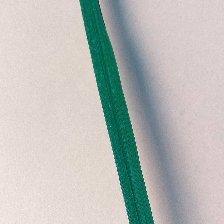

In [23]:
img=array_to_img(x_test[10])
img

In [24]:
print("original Label: ", all_labels[np.argmax(y_test[11])])
print("predicted Label: ", all_labels[np.argmax(y_pred[11])])
print(y_pred[11])


original Label:  Healthy
predicted Label:  Healthy
[0.43550804 0.29251775 0.27197418]


In [26]:
correct_predictions = 0

for i in range(100):
    true_label = all_labels[np.argmax(y_test[i])]
    predicted_label = all_labels[np.argmax(y_pred[i])]

    print(true_label, "-", predicted_label)

    if true_label == predicted_label:
        correct_predictions += 1

print("Number of correct predictions:", correct_predictions)


LeafBlast - Healthy
LeafBlast - Healthy
Healthy - Healthy
Healthy - Healthy
Hispa - Healthy
Healthy - Healthy
LeafBlast - LeafBlast
Healthy - Healthy
Healthy - Healthy
LeafBlast - Healthy
Healthy - Healthy
Healthy - Healthy
Healthy - Healthy
Healthy - Healthy
LeafBlast - Healthy
Healthy - Healthy
LeafBlast - LeafBlast
LeafBlast - LeafBlast
Healthy - Healthy
Healthy - Healthy
LeafBlast - Healthy
Healthy - Healthy
Healthy - Healthy
LeafBlast - Healthy
Healthy - Healthy
Healthy - Healthy
LeafBlast - Healthy
Healthy - Healthy
LeafBlast - LeafBlast
Healthy - Healthy
LeafBlast - Healthy
Healthy - LeafBlast
Healthy - Healthy
Hispa - Healthy
Healthy - Healthy
LeafBlast - Healthy
LeafBlast - LeafBlast
Hispa - Healthy
Healthy - Healthy
Hispa - Healthy
Healthy - Healthy
LeafBlast - Healthy
LeafBlast - Healthy
LeafBlast - Healthy
Healthy - Healthy
Hispa - Healthy
LeafBlast - Healthy
Healthy - Healthy
LeafBlast - Healthy
LeafBlast - Healthy
LeafBlast - LeafBlast
Healthy - Healthy
LeafBlast - Health